# フィッシャーのアヤメ

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。


これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。


Iris setosa - Wikipedia

Iris virgicolor - Wikipedia

Iris virginica - Wikipedia

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。


1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

# データセットの準備

scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

## 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。


sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation


データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。


pandas.DataFrame — pandas 0.24.2 documentation

目的変数も同様にyに格納してください。

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_dataset = load_iris()

In [3]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = pd.DataFrame(iris_dataset['data'], 
                 columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y = pd.DataFrame(iris_dataset['target'], columns=['Species'])
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

Merge, join, and concatenate — pandas 0.24.2 documentation

pandas.concat — pandas 0.24.2 documentation

In [6]:
df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。


pandas.DataFrame.head — pandas 0.25.3 documentation


pandas.DataFrame.info — pandas 0.25.3 documentation


pandas.DataFrame.describe — pandas 0.25.3 documentation


pandas.DataFrame.isnull — pandas 0.25.3 documentation


pandas.DataFrame.sum — pandas 0.25.3 documentation


pandas.Series.value_counts — pandas 0.25.3 documentation

In [7]:
#先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る（数値データか文字データかなど）
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#ラベルごとのサンプル数の合計を出力する
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [9]:
#特徴量に欠損値があるかを確認する
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [10]:
#特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

「アイリス花データ」とは、1936年の論文に、英国の統計学者・植物学者であったロナルド・フィッシャー氏が発表した多変量データ。 データセットは、アイリスの花の3種類(「Iris setosa」と「 Iris virginica」 と 「Iris versicolor」) を各々50サンプルずつ集めた計150のデータからなり、変数は、がく片の長さと幅、花びら長さと幅をcmで計測した4つの変量からなる。 この4つの変量の組合せを基にアイリスの花の種類(Iris setosa/Iris virginica/Iris versicolor)を分類するLDA(Linear Discriminant Analysis)モデルを開発した。

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png")

In [13]:
Image(url="https://miro.medium.com/max/612/1*gVUMIDt5Nz0WMArjgGN_Gg.png")

## 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

In [14]:
#sepal_widthの列を３つの異なる方法で抽出する
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [15]:
df.sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [16]:
df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [17]:
df.loc[:, ['sepal_width']]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [18]:
#50番目から99番目までのデータを抽出する
df[50:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [19]:
#petal_lengthの列の50番目から99番目までのデータを抽出する
df.loc[50:99, ['petal_length']]

,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


In [20]:
#petal_widthの値が0.2のデータを抽出する
df[df['petal_width'].isin([0.2])]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


### locとilocの違い

locではラベル名を指定する

ilocでは行と列の位置を値で指定する

## 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

([<matplotlib.patches.Wedge at 0x234a28521c8>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

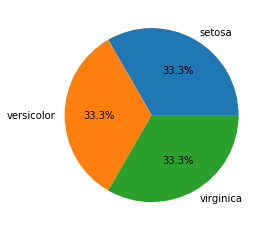

In [21]:
#ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

s1 = df[df['Species']==0]
s2 = df[df['Species']==1]
s3 = df[df['Species']==2]

data = [len(s1), len(s2), len(s3)]
label = iris_dataset.target_names

plt.pie(data,labels=label, autopct='%1.1f%%')

<function matplotlib.pyplot.show(*args, **kw)>

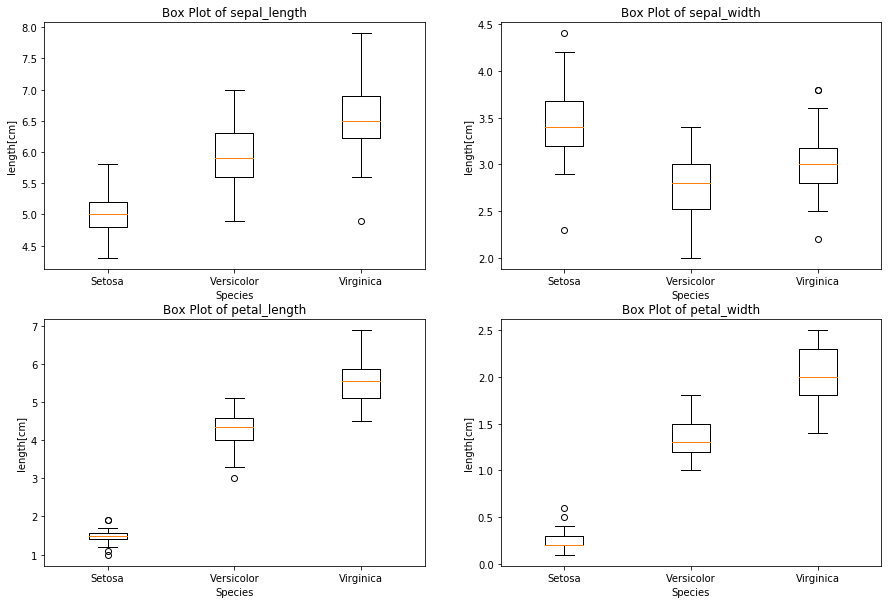

In [22]:
#特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
label = ['Setosa', 'Versicolor', 'Virginica']

#sepal_length
data1 = [s1.iloc[:, 0], s2.iloc[:, 0], s3.iloc[:, 0]]
ax1.boxplot(data1, labels=label)
ax1.set_title('Box Plot of sepal_length')
ax1.set_xlabel('Species')
ax1.set_ylabel('length[cm]')

#sepal_width
data2 = [s1.iloc[:, 1], s2.iloc[:, 1], s3.iloc[:, 1]]
ax2.boxplot(data2, labels=label)
ax2.set_title('Box Plot of sepal_width')
ax2.set_xlabel('Species')
ax2.set_ylabel('length[cm]')

#petal_length
data3 = [s1.iloc[:, 2], s2.iloc[:, 2], s3.iloc[:, 2]]
ax3.boxplot(data3, labels=label)
ax3.set_title('Box Plot of petal_length')
ax3.set_xlabel('Species')
ax3.set_ylabel('length[cm]')

#petal_width
data4 = [s1.iloc[:, 3], s2.iloc[:, 3], s3.iloc[:, 3]]
ax4.boxplot(data4, labels=label)
ax4.set_title('Box Plot of petal_width')
ax4.set_xlabel('Species')
ax4.set_ylabel('length[cm]')


plt.show

<function matplotlib.pyplot.show(*args, **kw)>

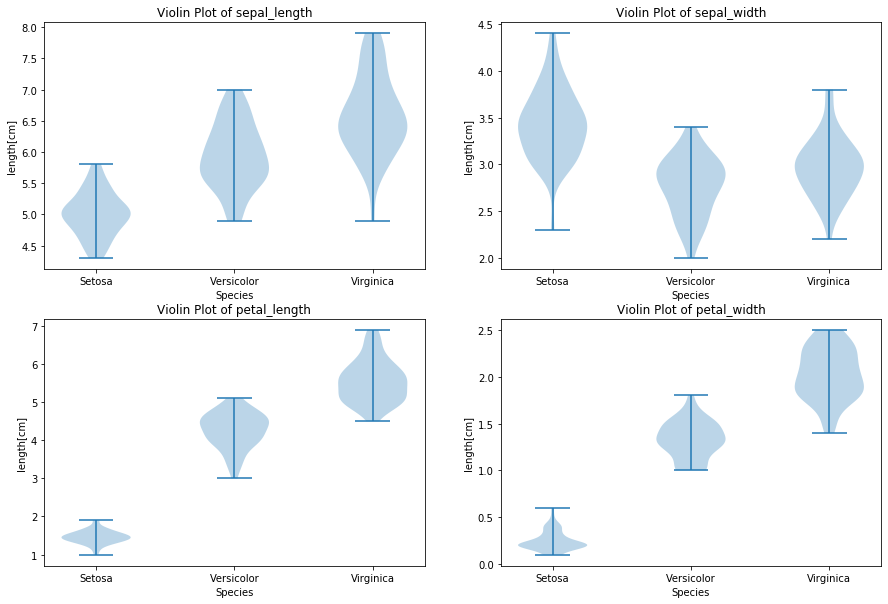

In [23]:
#特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
label = ['Setosa', 'Versicolor', 'Virginica']

#sepal_length
data1 = [s1.iloc[:, 0], s2.iloc[:, 0], s3.iloc[:, 0]]
ax1.violinplot(data1)
ax1.set_title('Violin Plot of sepal_length')
ax1.set_xlabel('Species')
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(label)
ax1.set_ylabel('length[cm]')

#sepal_width
data2 = [s1.iloc[:, 1], s2.iloc[:, 1], s3.iloc[:, 1]]
ax2.violinplot(data2)
ax2.set_title('Violin Plot of sepal_width')
ax2.set_xlabel('Species')
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(label)
ax2.set_ylabel('length[cm]')

#petal_length
data3 = [s1.iloc[:, 2], s2.iloc[:, 2], s3.iloc[:, 2]]
ax3.violinplot(data3)
ax3.set_title('Violin Plot of petal_length')
ax3.set_xlabel('Species')
ax3.set_xticks([1, 2, 3])
ax3.set_xticklabels(label)
ax3.set_ylabel('length[cm]')

#petal_width
data4 = [s1.iloc[:, 3], s2.iloc[:, 3], s3.iloc[:, 3]]
ax4.violinplot(data4)
ax4.set_title('Violin Plot of petal_width')
ax4.set_xlabel('Species')
ax4.set_xticks([1, 2, 3])
ax4.set_xticklabels(label)
ax4.set_ylabel('length[cm]')


plt.show

箱ひげ図は平均/中央値と四分位範囲という要約統計量を視覚化している
->数値を把握するのに適している。

バイオリンプロットは、ヒストグラムを縦にした形でデータ全体の分布の形を視覚化している。
->分布の形を把握するのに適している

データ分布が複数のピークがある場合(今回で言うとpetal_length, petal_width)、バイオリン図では複数のピークの位置と大きさが明確に表現されるが、これは箱ひげ図では表現されない。


## 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

<function matplotlib.pyplot.show(*args, **kw)>

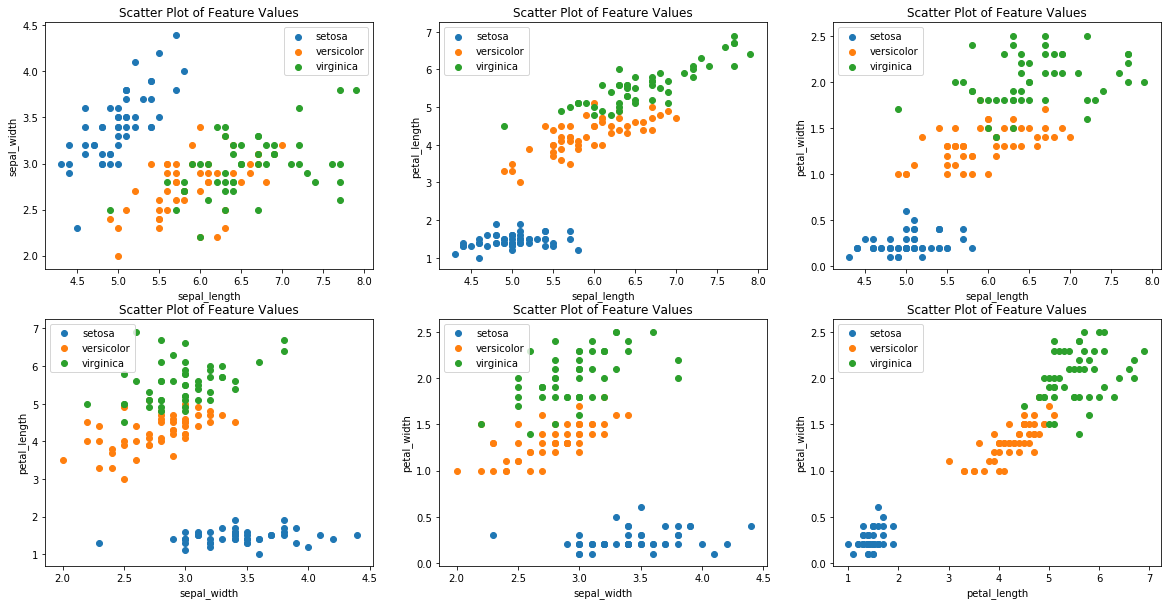

In [25]:
#縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))


s1 = df[df['Species']==0]
s2 = df[df['Species']==1]
s3 = df[df['Species']==2]

labels = iris_dataset.target_names
label = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


ax1.scatter(s1.iloc[:, 0], s1.iloc[:, 1], label=labels[0])
ax1.scatter(s2.iloc[:, 0], s2.iloc[:, 1], label=labels[1])
ax1.scatter(s3.iloc[:, 0], s3.iloc[:, 1], label=labels[2])

ax1.set_title('Scatter Plot of Feature Values')
ax1.set_xlabel(label[0])
ax1.set_ylabel(label[1])
ax1.legend()

ax2.scatter(s1.iloc[:, 0], s1.iloc[:, 2], label=labels[0])
ax2.scatter(s2.iloc[:, 0], s2.iloc[:, 2], label=labels[1])
ax2.scatter(s3.iloc[:, 0], s3.iloc[:, 2], label=labels[2])

ax2.set_title('Scatter Plot of Feature Values')
ax2.set_xlabel(label[0])
ax2.set_ylabel(label[2])
ax2.legend()

ax3.scatter(s1.iloc[:, 0], s1.iloc[:, 3], label=labels[0])
ax3.scatter(s2.iloc[:, 0], s2.iloc[:, 3], label=labels[1])
ax3.scatter(s3.iloc[:, 0], s3.iloc[:, 3], label=labels[2])

ax3.set_title('Scatter Plot of Feature Values')
ax3.set_xlabel(label[0])
ax3.set_ylabel(label[3])
ax3.legend()

ax4.scatter(s1.iloc[:, 1], s1.iloc[:, 2], label=labels[0])
ax4.scatter(s2.iloc[:, 1], s2.iloc[:, 2], label=labels[1])
ax4.scatter(s3.iloc[:, 1], s3.iloc[:, 2], label=labels[2])

ax4.set_title('Scatter Plot of Feature Values')
ax4.set_xlabel(label[1])
ax4.set_ylabel(label[2])
ax4.legend()

ax5.scatter(s1.iloc[:, 1], s1.iloc[:, 3], label=labels[0])
ax5.scatter(s2.iloc[:, 1], s2.iloc[:, 3], label=labels[1])
ax5.scatter(s3.iloc[:, 1], s3.iloc[:, 3], label=labels[2])

ax5.set_title('Scatter Plot of Feature Values')
ax5.set_xlabel(label[1])
ax5.set_ylabel(label[3])
ax5.legend()

ax6.scatter(s1.iloc[:, 2], s1.iloc[:, 3], label=labels[0])
ax6.scatter(s2.iloc[:, 2], s2.iloc[:, 3], label=labels[1])
ax6.scatter(s3.iloc[:, 2], s3.iloc[:, 3], label=labels[2])

ax6.set_title('Scatter Plot of Feature Values')
ax6.set_xlabel(label[2])
ax6.set_ylabel(label[3])
ax6.legend()

plt.show

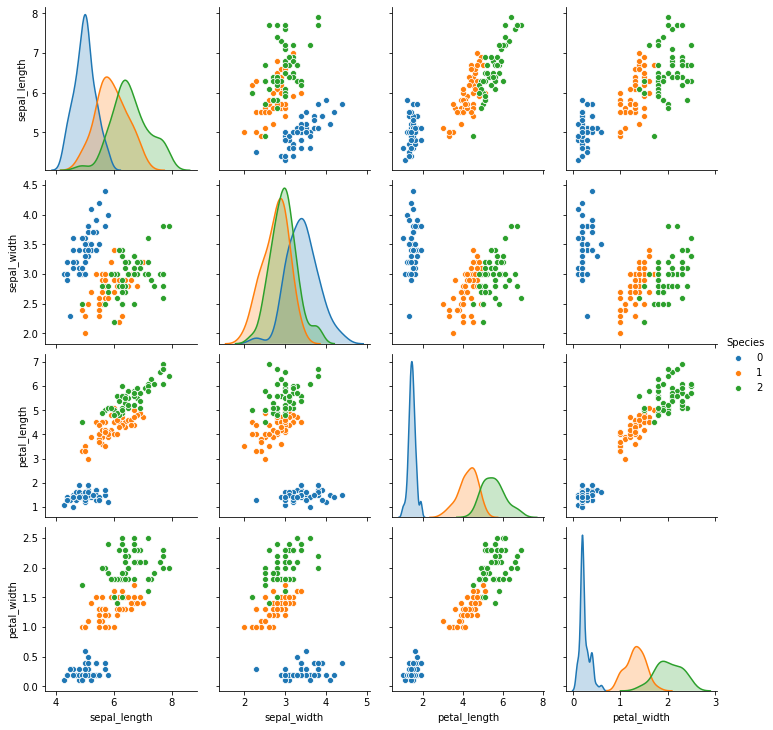

In [26]:
#全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
sns.pairplot(df, hue='Species', )

In [27]:
#４つの特徴量に関する相関係数行列を作る
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


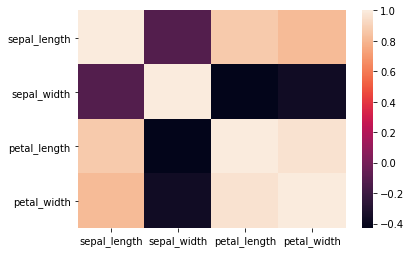

In [28]:
#相関係数行列のヒートマップを作る
sns.heatmap(X.corr())

## 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。


例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

散布図行列の全体的な傾向として、原点に近い順からsetosa, versicolor, virginicaと分布している。
このことから目視で見分ける際、花弁(petal)、がく片(sepal)が小さいほうからsetosa, versicolor, virginicaという推測ができる。

どの散布図においてもsetosaのプロットの集合が比較的独立しており、明瞭な特徴を持っていることが分かる。
ヒストグラムを見ると、特に花弁に特徴が出ており、花弁(petal)の幅、長さがversicolor, virginicaに比べて小さい値に偏っている。
(バイオリンプロットの花弁(petal_length, petal_width)においてピークが2つあるのはこのため)

相関係数行列から、花弁の幅と長さに強い正の相関関係があり、長くなるにつれて幅も広くなることが分かる。小さいほうからsetosa, versicolor, viginicaと分布していることから、花弁(petal)が小ぶりな方からsetosa, versicolor, virginicaという見分け方の裏づけにもなる。